<b>Predict Clicked Ads Customer by using Machine Learning<b>

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Modeling Library

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.inspection import permutation_importance

## Import Data

In [3]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [5]:
df.shape

(1000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [7]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category'],
      dtype='object')

## Statistical Summary

In [8]:
cats = df.select_dtypes(include = 'object')
nums = df.select_dtypes(exclude = 'object')
cats_cols = cats.columns.to_list()
nums_cols = nums.columns.to_list()
print('Data category: ',cats_cols)
print('Data numerik: ',nums_cols)

Data category:  ['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']
Data numerik:  ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']


In [9]:
df[nums_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [10]:
df[cats_cols].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [11]:
for i in cats:
    print('---'*10)
    print(i)
    print(df[i].value_counts())

------------------------------
Male
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64
------------------------------
Timestamp
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64
------------------------------
Clicked on Ad
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
------------------------------
city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               

## Feature Engineering

In [12]:
df.Timestamp.dtype

dtype('O')

In [13]:
df.Timestamp = pd.to_datetime(df.Timestamp)

In [14]:
df.Timestamp.dtype

dtype('<M8[ns]')

In [15]:
df['month'] = df.Timestamp.dt.month
df.month.unique()

array([3, 4, 1, 6, 5, 7, 2], dtype=int64)

## Univariate Analysis

### Numerical Feature

In [16]:
len(nums_cols)

4

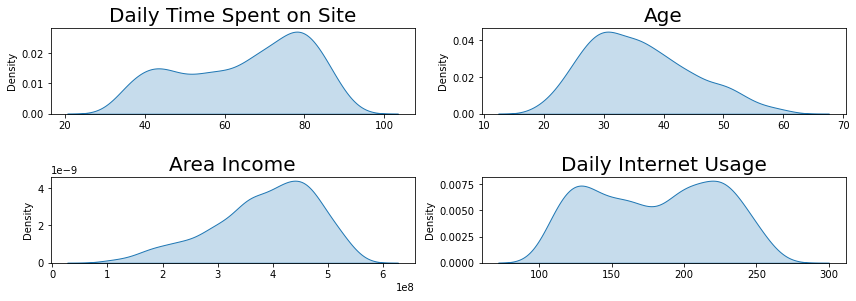

In [17]:
plt.figure(figsize=(12,8))
for i in range(0,len(nums_cols)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x=df[nums_cols[i]], palette='viridis', shade=True)
    plt.title(nums_cols[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

1. Feature `Daily Time Spent on Site` memiliki distribusi skew dengan nilai rata-rata lebih besar dari nilai median
2. Feature `Age` mendekati distribusi normal dengan umur rata-rata 36 tahun
3. Feature `Area Income` memiliki distribusi skew dengan nilai median lebih besar dari nilai rata-rata
4. Feature`Daily Internet Usage` memiliki distribusi skew dengan nilai median lebih besar dari nilai rata-rata

### Categorical Feature

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  987 non-null    float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               987 non-null    float64       
 3   Daily Internet Usage      989 non-null    float64       
 4   Male                      997 non-null    object        
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   object        
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
 10  month                     1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 86.1+ KB


In [19]:
cats = ['Male','Clicked on Ad','city','province','category','month']

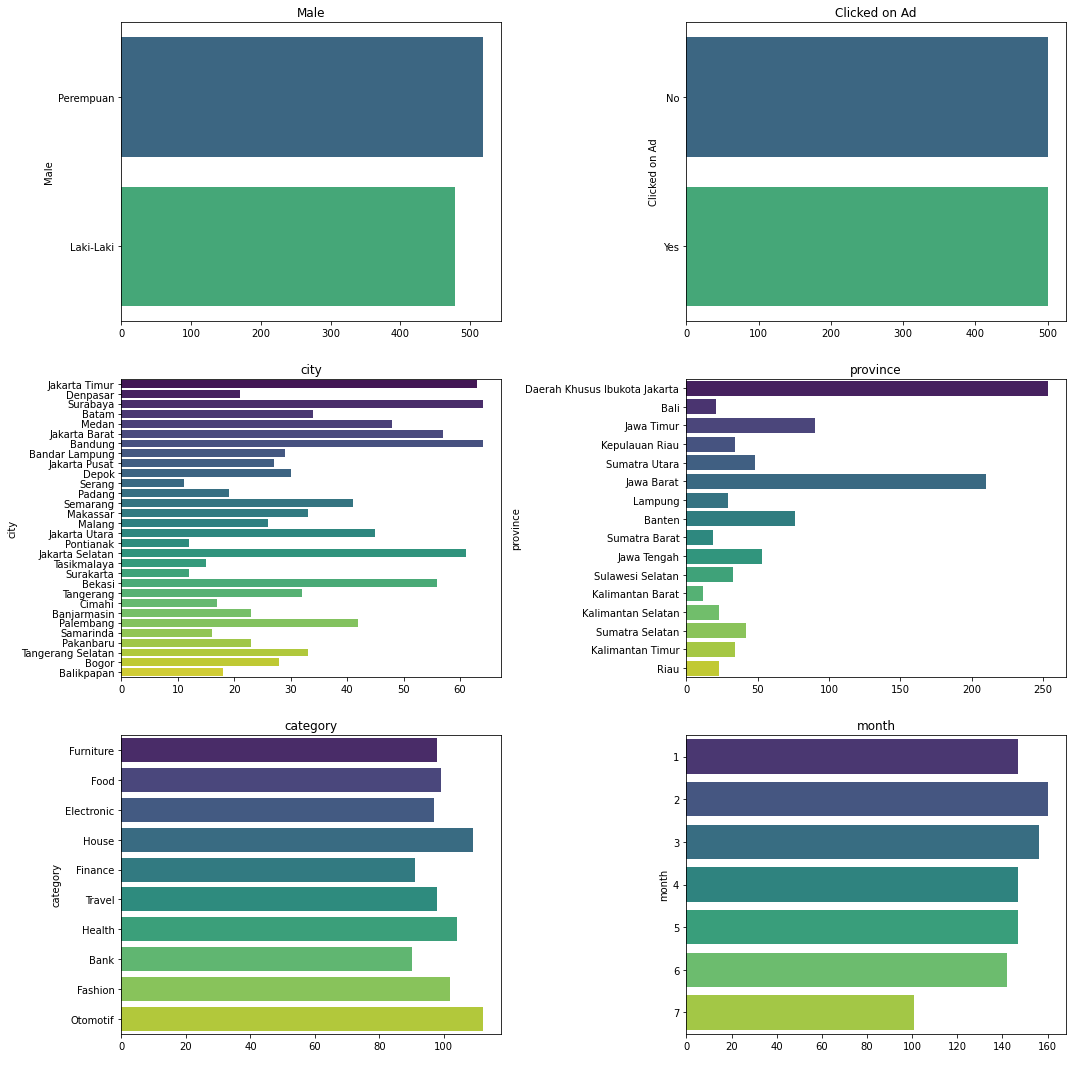

In [20]:
plt.figure(figsize=(15,15))
for i in range(0,len(cats)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cats[i]], orient = 'h',palette='viridis')
    plt.title(cats[i])
    plt.xlabel(' ')
    plt.tight_layout()

1. Feature `Male` didominasi oleh perempuan
2. Feature `Clicked on Ad` memiliki jumlah yang seimbang antara label `yes` dan label `no`
3. Feature `city` didominasi oleh kota `Surabaya` dan `Bandung`
4. Feature `province` didominasi oleh `Daerah Khusus Ibu Kota Jakarta`
5. Feature`category` didominasi oleh otomotif,dimana banyak yang berminat untuk melihat iklan ototmotif
6. Feature `month` didominasi oleh bulan februari/`2`

### Biavariate Analaysis

### Numerical Feature

<Figure size 720x720 with 0 Axes>

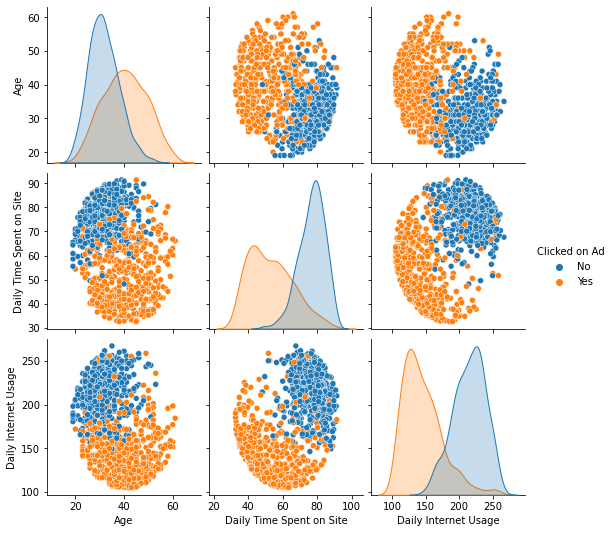

In [21]:
plt.figure(figsize = (10,10))
sns.pairplot(df[['Age','Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']], diag_kind='kde',hue='Clicked on Ad')
plt.show()

In [22]:
nums2 = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']

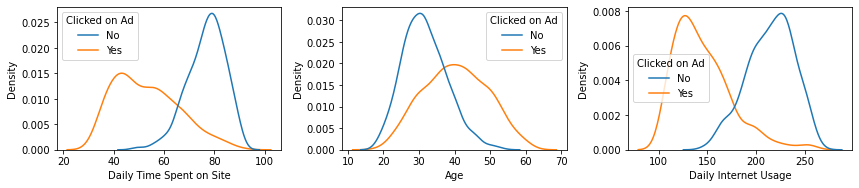

In [23]:
plt.figure(figsize= (16,10))
for i in range(0, len(nums2)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(x=df[nums2[i]], hue=df['Clicked on Ad'])
    plt.xlabel(nums2[i])
    plt.tight_layout()

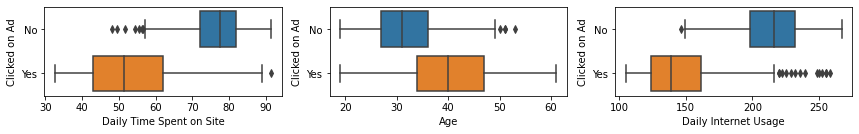

In [24]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums2)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[nums2[i]],y=df['Clicked on Ad'])
    plt.xlabel(nums2[i])
    plt.tight_layout()

* User dengan `Daily Time Spent on Site` 20-50 cenderung untuk mengclick ads yang diberikan dibandingkan user dengan `Daily Time Spent on Site` 60-100. Hal ini bisa terjadi mungkin karena user `Daily Time Spent on Site` 60-100 sudah mengetahui hal apa yang ingin dilihat sehingga menghiraukan ads yang ditawarkan 
* User dengan rentang umur 35-45 cenderung untuk mengclick ads yang diberikan.Sementara user diabwah 35 tahun cenderung menghiraukan ads yang diberikan
* User dengan `Daily Internet Usage` yang relatif singkat cenderung untuk mengclick ads yang diberikan dibandingkan user dengan `Dailiy Internet Usage` yang relatif lama.

### Categorical Feature

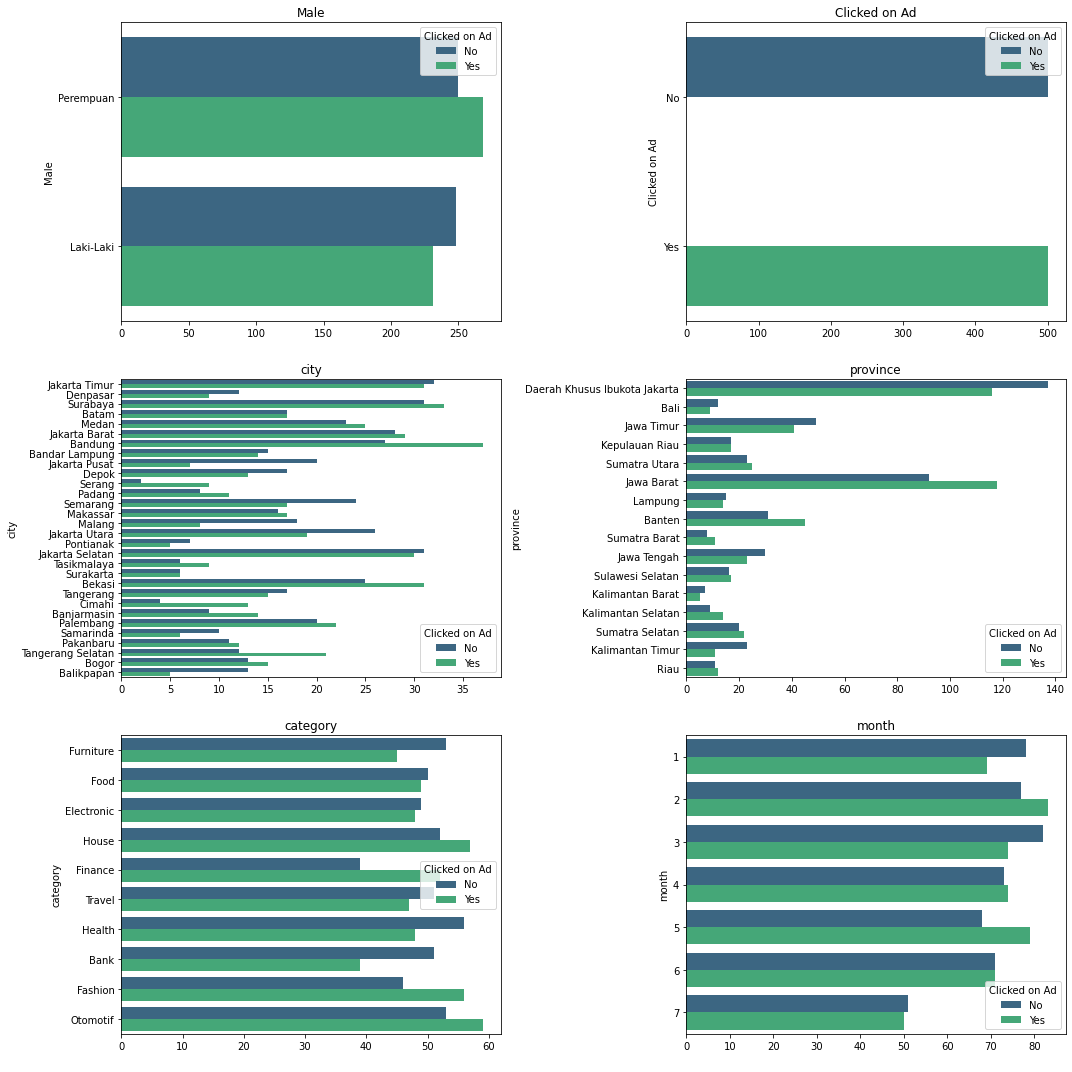

In [25]:
plt.figure(figsize=(15,15))
for i in range(0,len(cats)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cats[i]], palette='viridis', hue=df['Clicked on Ad'])
    plt.title(cats[i])
    plt.xlabel(' ')
    plt.tight_layout()

* Pada feature `Male`, user perempuan lebih banyak mengclick Ads dibandingkan user laki-laki
* Category iklan otomotif cenderung lebih banyak untuk diclick,disusul Fashion, dan House.Sementara category Health memiliki jumlah tertinggi untuk tidak diclick Ads
* Bulan `2` / Februari menjadi bulan terbanyak untuk user mengclick ads yang diberikan
* User di Provinsi Jawa Barat cenderung untuk mengclick ads yang diberikan, sementara DKI Jakarta lebih banyak menghiraukan ads
* Kota Bandung menjadi jumlah user terbanyak yang mengclik ads

## Multivariate Analysis

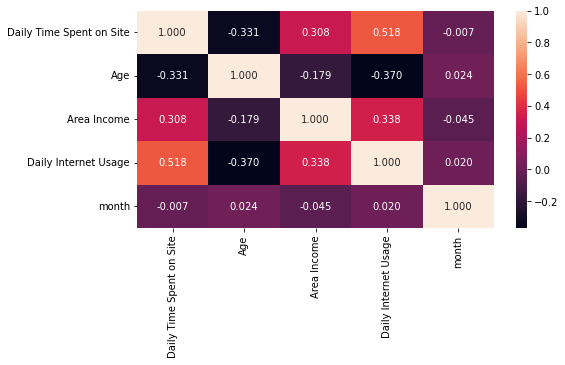

In [26]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, fmt='.3f')
plt.show()

* Feature `Daily Time Spent on Site` berkorelasi positif cukup tinggi dengan `Daily Internet Usage`
* Feature `Age` berkorelasi negatif dengan feature `Daily Time Spent on Site`, `Area Income` dan `Daily Internet Usage`
* Feature Area Income berkorelasi positif dengan feature `Daily Time Spent on Site` dan `Daily Internet Usage` dan berkorelasi negatif dengan feature `Age`

## Cleaning Data and Pre-Processing

In [27]:
df_clean = df.copy()

In [28]:
df_clean.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'month'],
      dtype='object')

## Check Missing Values

In [29]:
df_clean.isnull().sum().sort_values(ascending = False)

Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Male                         3
Age                          0
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
month                        0
dtype: int64

In [30]:
for col in df_clean.select_dtypes(exclude = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())
df_clean.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        3
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
month                       0
dtype: int64

In [31]:
df_clean['Male'].fillna('Perempuan',inplace = True)
df_clean.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
month                       0
dtype: int64

## Check Duplicated Data

In [32]:
df_clean.duplicated().sum()

0

In [33]:
#Feature Enginerring
df_clean['year']=df_clean.Timestamp.dt.year
df_clean['week']=df_clean.Timestamp.dt.isocalendar().week
df_clean['day']=df_clean.Timestamp.dt.day

In [34]:
df_clean.week = df_clean.week.astype('int64')

In [35]:
df_clean.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,month,year,week,day
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,3,2016,12,27
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,4,2016,14,4
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,3,2016,10,13
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,1,2016,1,10
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,6,2016,22,3


In [36]:
df_clean.replace('Daerah Khusus Ibukota Jakarta','DKI Jakarta',inplace=True)

In [37]:
df_cleaned = df_clean.copy()

## Feature Encoding

In [38]:
# Feature Encoding
df_encode = df_cleaned.copy()

In [39]:
df_encode['Male'] = np.where(df_encode['Male'] == 'Laki-Laki',1,0)
df_encode['Clicked on Ad'] = np.where(df_encode['Clicked on Ad'] == 'Yes',1,0)


In [40]:
print(df_encode['Clicked on Ad'].unique())
print(df_encode['Male'].unique())

[0 1]
[0 1]


In [41]:
# One Hot Encoding
ohe_cols = ['province','category']

In [42]:
for cat in ohe_cols:
    onehots = pd.get_dummies(df_encode[cat],prefix = cat)
    df_encode = df_encode.join(onehots)

In [43]:
df_encode.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'city',
       'province', 'category', 'month', 'year', 'week', 'day', 'province_Bali',
       'province_Banten', 'province_DKI Jakarta', 'province_Jawa Barat',
       'province_Jawa Tengah', 'province_Jawa Timur',
       'province_Kalimantan Barat', 'province_Kalimantan Selatan',
       'province_Kalimantan Timur', 'province_Kepulauan Riau',
       'province_Lampung', 'province_Riau', 'province_Sulawesi Selatan',
       'province_Sumatra Barat', 'province_Sumatra Selatan',
       'province_Sumatra Utara', 'category_Bank', 'category_Electronic',
       'category_Fashion', 'category_Finance', 'category_Food',
       'category_Furniture', 'category_Health', 'category_House',
       'category_Otomotif', 'category_Travel'],
      dtype='object')

Drop kolom yang telah dilakukan feature encoding dan feature extraction

In [44]:
df_encode = df_encode.drop(columns = ['Timestamp','province','category'])
df_encode

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,city,month,year,week,day,province_Bali,province_Banten,province_DKI Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,0,Jakarta Timur,3,2016,12,27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,0,Denpasar,4,2016,14,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,0,Surabaya,3,2016,10,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,0,Batam,1,2016,1,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,0,Medan,6,2016,22,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,1,1,Semarang,2,2016,6,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
996,51.30,45,474475190.0,134.42,1,1,Pakanbaru,4,2016,16,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
997,68.11,51,296910040.0,120.37,1,1,Samarinda,2,2016,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
998,55.55,19,293445530.0,187.95,0,0,Tangerang,3,2016,12,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Drop fitur `year` karena hanya memiliki 1 unique value saja dan fitur `city` memiliki jumlah unique value yang terlalu banyak dan sudah digantikan dengan `province`

In [45]:
df_encode = df_encode.drop(columns = ['year','city'])
df_encode

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,month,week,day,province_Bali,province_Banten,province_DKI Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,0,3,12,27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,0,4,14,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,0,3,10,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,0,1,1,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,0,6,22,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,1,1,2,6,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
996,51.30,45,474475190.0,134.42,1,1,4,16,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
997,68.11,51,296910040.0,120.37,1,1,2,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
998,55.55,19,293445530.0,187.95,0,0,3,12,24,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [46]:
df_encoded = df_encode.copy()

## Split Feature and Target

In [47]:
df_model = df_encoded.copy()

In [48]:
df_model['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [49]:
X = df_model.drop(columns = ['Clicked on Ad'])
y = df_model['Clicked on Ad']

Tidak handle imbalance data karena jumlah sudah seimbang

## Split Data Into Train set and Test set

In [50]:
X1 = X.copy()
y1 = y.copy()
X2 = X.copy()
y2 = y.copy()

# Experiment 1

### Split Train 70% dan Test 30%

In [51]:
from sklearn.model_selection import train_test_split 
#70 : 30
X1_train1, X1_test1, y1_train1, y1_test1 = train_test_split(X1,y1,test_size=0.3, random_state=24)
# 80 : 20
X1_train2, X1_test2, y1_train2, y1_test2 = train_test_split(X1,y1,test_size=0.2, random_state=24)


In [52]:

print('Split into 70:30')
print('Total rows & column of train set:',X1_train1.shape)
print('Total rows & column of test set:',X1_test1.shape)
print('\nSplit into 80:20')
print('Total rows & column of train set:',X1_train2.shape)
print('Total rows & column of test set:',X1_test2.shape)

Split into 70:30
Total rows & column of train set: (700, 34)
Total rows & column of test set: (300, 34)

Split into 80:20
Total rows & column of train set: (800, 34)
Total rows & column of test set: (200, 34)


## Machine Learning model before normalization/standarization

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model,  y_train_pred, y_test_pred, y_train, y_test):
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_train_pred))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_test_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_train_pred, zero_division=0))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_test_pred, zero_division=0))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_train_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_test_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_train_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_test_pred))
    
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=1) 
    print("AUC (Train Set): %.2f" % auc(fpr, tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1) 
    print("AUC (Test Set): %.2f" % auc(fpr, tpr))

# confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

#### 70% : 30%

### Logistic Regression

In [54]:
logreg = LogisticRegression(random_state=24)
logreg.fit(X1_train1,y1_train1)

y_train_pred = logreg.predict(X1_train1)
y_pred = logreg.predict(X1_test1)
eval_classification(logreg,y_train_pred,y_pred,y1_train1,y1_test1)

Accuracy (Train Set): 0.50
Accuracy (Test Set): 0.50
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00
AUC (Train Set): 0.50
AUC (Test Set): 0.50


### Decision Tree

In [55]:
dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X1_train1,y1_train1)

y_train_pred = dtc.predict(X1_train1)
y_pred = dtc.predict(X1_test1)
eval_classification(dtc,y_train_pred,y_pred,y1_train1,y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.90
Precision (Train Set): 1.00
Precision (Test Set): 0.88
Recall (Train Set): 1.00
Recall (Test Set): 0.93
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.90
AUC (Train Set): 1.00
AUC (Test Set): 0.90


### Random Forest

In [56]:
rfc = RandomForestClassifier(random_state=24)
rfc.fit(X1_train1,y1_train1)

y_train_pred = rfc.predict(X1_train1)
y_pred = rfc.predict(X1_test1)
eval_classification(rfc,y_train_pred,y_pred,y1_train1,y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.94
Recall (Train Set): 1.00
Recall (Test Set): 0.96
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95
AUC (Train Set): 1.00
AUC (Test Set): 0.95


#### AdaBoost

In [57]:
ab = AdaBoostClassifier(random_state=24)
ab.fit(X1_train1,y1_train1)

y_train_pred = ab.predict(X1_train1)
y_pred = ab.predict(X1_test1)
eval_classification(ab,y_train_pred,y_pred,y1_train1,y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.94
Recall (Train Set): 0.99
Recall (Test Set): 0.93
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94
AUC (Train Set): 1.00
AUC (Test Set): 0.94


### Gradient Boosting

In [58]:
gbc = GradientBoostingClassifier(random_state=24)
gbc.fit(X1_train1,y1_train1)

y_train_pred = gbc.predict(X1_train1)
y_pred = gbc.predict(X1_test1)
eval_classification(gbc,y_train_pred,y_pred,y1_train1,y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.94
Recall (Train Set): 1.00
Recall (Test Set): 0.96
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95
AUC (Train Set): 1.00
AUC (Test Set): 0.95


In [59]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=24)
xg.fit(X1_train1, y1_train1)

y_train_pred = xg.predict(X1_train1)
y_pred = xg.predict(X1_test1)
eval_classification(xg,y_train_pred,y_pred,y1_train1,y1_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.96
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95
AUC (Train Set): 1.00
AUC (Test Set): 0.95


#### 80% : 20%

### Logistic Regression

In [60]:
logreg = LogisticRegression(random_state=24)
logreg.fit(X1_train2,y1_train2)

y_train_pred = logreg.predict(X1_train2)
y_pred = logreg.predict(X1_test2)
eval_classification(logreg,y_train_pred,y_pred,y1_train2,y1_test2)

Accuracy (Train Set): 0.50
Accuracy (Test Set): 0.50
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00
AUC (Train Set): 0.50
AUC (Test Set): 0.50


### Decision Tree

In [61]:
dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X1_train2,y1_train2)

y_train_pred = dtc.predict(X1_train2)
y_pred = dtc.predict(X1_test2)
eval_classification(dtc,y_train_pred,y_pred,y1_train2,y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.93
Precision (Train Set): 1.00
Precision (Test Set): 0.91
Recall (Train Set): 1.00
Recall (Test Set): 0.94
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.93
AUC (Train Set): 1.00
AUC (Test Set): 0.93


### Random Forest

In [62]:
rfc = RandomForestClassifier(random_state=24)
rfc.fit(X1_train2,y1_train2)

y_train_pred = rfc.predict(X1_train2)
y_pred = rfc.predict(X1_test2)
eval_classification(rfc,y_train_pred,y_pred,y1_train2,y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.95
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95
AUC (Train Set): 1.00
AUC (Test Set): 0.95


#### AdaBoost

In [63]:
ab = AdaBoostClassifier(random_state=24)
ab.fit(X1_train2,y1_train2)

y_train_pred = ab.predict(X1_train2)
y_pred = ab.predict(X1_test2)
eval_classification(ab,y_train_pred,y_pred,y1_train2,y1_test2)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 0.99
Recall (Test Set): 0.96
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.96
AUC (Train Set): 0.99
AUC (Test Set): 0.95


### Gradient Boosting

In [64]:
gbc = GradientBoostingClassifier(random_state=24)
gbc.fit(X1_train2,y1_train2)

y_train_pred = gbc.predict(X1_train2)
y_pred = gbc.predict(X1_test2)
eval_classification(gbc,y_train_pred,y_pred,y1_train2,y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.96
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.96
AUC (Train Set): 1.00
AUC (Test Set): 0.95


In [65]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=24)
xg.fit(X1_train2, y1_train2)

y_train_pred = xg.predict(X1_train2)
y_pred = xg.predict(X1_test2)
eval_classification(xg,y_train_pred,y_pred,y1_train2,y1_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.94
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94
AUC (Train Set): 1.00
AUC (Test Set): 0.94


# Experiment 2

In [66]:
to_std = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','month','week','day']
ss = StandardScaler()

for col in to_std :
    X2[col] = ss.fit_transform(X2[[col]])

### Split Train 70% dan Test 30%

In [67]:
from sklearn.model_selection import train_test_split 
#70 : 30
X2_train1, X2_test1, y2_train1, y2_test1 = train_test_split(X2,y2,test_size=0.3, random_state=24)
# 80 : 20
X2_train2, X2_test2, y2_train2, y2_test2 = train_test_split(X2,y2,test_size=0.2, random_state=24)


In [68]:

print('Split into 70:30')
print('Total rows & column of train set:',X2_train1.shape)
print('Total rows & column of test set:',X2_test1.shape)
print('\nSplit into 80:20')
print('Total rows & column of train set:',X2_train2.shape)
print('Total rows & column of test set:',X2_test2.shape)

Split into 70:30
Total rows & column of train set: (700, 34)
Total rows & column of test set: (300, 34)

Split into 80:20
Total rows & column of train set: (800, 34)
Total rows & column of test set: (200, 34)


## Machine Learning model After normalization/standarization

#### 70% : 30%

### Logistic Regression

In [69]:
logreg = LogisticRegression(random_state=24)
logreg.fit(X2_train1,y2_train1)

y_train_pred = logreg.predict(X2_train1)
y_pred = logreg.predict(X2_test1)
eval_classification(logreg,y_train_pred,y_pred,y2_train1,y2_test1)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.96
Precision (Train Set): 0.99
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.96
F1-Score (Train Set): 0.98
F1-Score (Test Set): 0.96
AUC (Train Set): 0.98
AUC (Test Set): 0.96


### Decision Tree

In [70]:
dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X2_train1,y2_train1)

y_train_pred = dtc.predict(X2_train1)
y_pred = dtc.predict(X2_test1)
eval_classification(dtc,y_train_pred,y_pred,y2_train1,y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.90
Precision (Train Set): 1.00
Precision (Test Set): 0.88
Recall (Train Set): 1.00
Recall (Test Set): 0.93
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.90
AUC (Train Set): 1.00
AUC (Test Set): 0.90


### Random Forest

In [71]:
rfc = RandomForestClassifier(random_state=24)
rfc.fit(X2_train1,y2_train1)

y_train_pred = rfc.predict(X2_train1)
y_pred = rfc.predict(X2_test1)
eval_classification(rfc,y_train_pred,y_pred,y2_train1,y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.94
Recall (Train Set): 1.00
Recall (Test Set): 0.96
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95
AUC (Train Set): 1.00
AUC (Test Set): 0.95


#### AdaBoost

In [72]:
ab = AdaBoostClassifier(random_state=24)
ab.fit(X2_train1,y2_train1)

y_train_pred = ab.predict(X2_train1)
y_pred = ab.predict(X2_test1)
eval_classification(ab,y_train_pred,y_pred,y2_train1,y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.94
Recall (Train Set): 0.99
Recall (Test Set): 0.93
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94
AUC (Train Set): 1.00
AUC (Test Set): 0.94


### Gradient Boosting

In [73]:
gbc = GradientBoostingClassifier(random_state=24)
gbc.fit(X2_train1,y2_train1)

y_train_pred = gbc.predict(X2_train1)
y_pred = gbc.predict(X2_test1)
eval_classification(gbc,y_train_pred,y_pred,y2_train1,y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.94
Recall (Train Set): 1.00
Recall (Test Set): 0.96
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95
AUC (Train Set): 1.00
AUC (Test Set): 0.95


In [74]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=24)
xg.fit(X2_train1, y2_train1)

y_train_pred = xg.predict(X2_train1)
y_pred = xg.predict(X2_test1)
eval_classification(xg,y_train_pred,y_pred,y2_train1,y2_test1)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.96
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95
AUC (Train Set): 1.00
AUC (Test Set): 0.95


#### 80% : 20%

### Logistic Regression

In [75]:
logreg = LogisticRegression(random_state=24)
logreg.fit(X2_train2,y2_train2)

y_train_pred = logreg.predict(X2_train2)
y_pred = logreg.predict(X2_test2)
eval_classification(logreg,y_train_pred,y_pred,y2_train2,y2_test2)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.95
Precision (Train Set): 0.98
Precision (Test Set): 0.95
Recall (Train Set): 0.97
Recall (Test Set): 0.96
F1-Score (Train Set): 0.97
F1-Score (Test Set): 0.96
AUC (Train Set): 0.98
AUC (Test Set): 0.95


### Decision Tree

In [76]:
dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X2_train2,y2_train2)

y_train_pred = dtc.predict(X2_train2)
y_pred = dtc.predict(X2_test2)
eval_classification(dtc,y_train_pred,y_pred,y2_train2,y2_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.93
Precision (Train Set): 1.00
Precision (Test Set): 0.91
Recall (Train Set): 1.00
Recall (Test Set): 0.94
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.93
AUC (Train Set): 1.00
AUC (Test Set): 0.93


### Random Forest

In [77]:
rfc = RandomForestClassifier(random_state=24)
rfc.fit(X2_train2,y2_train2)

y_train_pred = rfc.predict(X2_train2)
y_pred = rfc.predict(X2_test2)
eval_classification(rfc,y_train_pred,y_pred,y2_train2,y2_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.95
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95
AUC (Train Set): 1.00
AUC (Test Set): 0.95


#### AdaBoost

In [78]:
ab = AdaBoostClassifier(random_state=24)
ab.fit(X2_train2,y2_train2)

y_train_pred = ab.predict(X2_train2)
y_pred = ab.predict(X2_test2)
eval_classification(ab,y_train_pred,y_pred,y2_train2,y2_test2)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 0.99
Recall (Test Set): 0.96
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.96
AUC (Train Set): 0.99
AUC (Test Set): 0.95


### Gradient Boosting

In [79]:
gbc = GradientBoostingClassifier(random_state=24)
gbc.fit(X2_train2,y2_train2)

y_train_pred = gbc.predict(X2_train2)
y_pred = gbc.predict(X2_test2)
eval_classification(gbc,y_train_pred,y_pred,y2_train2,y2_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.96
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.96
AUC (Train Set): 1.00
AUC (Test Set): 0.95


In [80]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=24)
xg.fit(X2_train2, y2_train2)

y_train_pred = xg.predict(X2_train2)
y_pred = xg.predict(X2_test2)
eval_classification(xg,y_train_pred,y_pred,y2_train2,y2_test2)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.94
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 1.00
Recall (Test Set): 0.94
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.94
AUC (Train Set): 1.00
AUC (Test Set): 0.94


### Selected Model

Terlihat Model Logistic Regression dengan komposisi 70% data train: 30% data train mendapatkan hasil yang cukup baik tanpa tuning. Selanjutnya akan fokus modeling logistic regression dengan tuning

In [81]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [82]:
from sklearn.model_selection import RandomizedSearchCV
#List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = np.logspace(-4,4,20)
hyperparameters = dict(penalty = penalty,C=C)

logreg = LogisticRegression(random_state=24)
logreg_tuned = GridSearchCV(logreg,hyperparameters, cv=5)
best_model = logreg_tuned.fit(X2_train1,y2_train1)

y_train_pred = logreg_tuned.predict(X2_train1)
y_pred = logreg_tuned.predict(X2_test1)
eval_classification(logreg_tuned,y_train_pred,y_pred,y2_train1,y2_test1)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.97
Precision (Train Set): 0.99
Precision (Test Set): 0.97
Recall (Train Set): 0.95
Recall (Test Set): 0.96
F1-Score (Train Set): 0.97
F1-Score (Test Set): 0.97
AUC (Train Set): 0.97
AUC (Test Set): 0.97


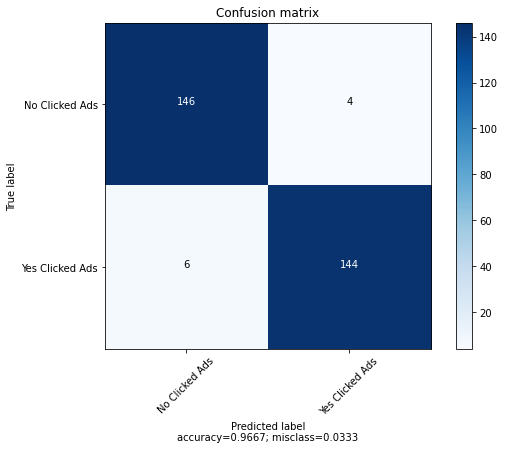

In [83]:
cm = confusion_matrix(y2_test1,y_pred)
target_names = ['No Clicked Ads','Yes Clicked Ads']

plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

In [84]:
show_best_hyperparameter(logreg_tuned.best_estimator_, hyperparameters)

Best penalty: l2
Best C: 0.08858667904100823
